# Seminar 8

## Recap of random variables

A **random variable** is a function from sample space to the real numbers $X: S \to \mathbb{R}$.

## Recap of distributions

For a random variable $X: S \to \mathbb{R}$, its distribution acts on numbers in $\mathbb{R}$ in the same way as probability function $P$ acts on outcomes.

## Recap of functions describing distributions

- For any distribution we have **cumulative distribution function** (CDF) $F_X(x) = \mathbb{P}(X \leqslant x)$
- For discrete distributions we have **probability mass function** (PMF) $\mathbb{P}_X(x) = \mathbb{P}(X = x)$
- For continuous distributions we have **probability density function** (PDF) $f_X(x) = F'_X(x)$

## Summaries of distribution

What else can we use to describe the distribution? We can use real numbers that give us an understanding of the distribution. Such numbers include
- **Median.** $m$ is a median of $X$, if $\mathbb{P}(X \leqslant m) \geqslant \frac12$ and $\mathbb{P}(X \geqslant m) \geqslant \frac12$
- **Mode.** $m$ is a mode of $X$, if $\mathbb{P}(X = m) \geqslant \mathbb{P}(X = x), \; \forall x$. For a continuous r.v. the mode maximizes the PDF $f_X(m) \geqslant f_X(x), \; \forall x$.s

In [41]:
import numpy as np
import scipy.stats as sts

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_87311/2600749600.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


<Figure size 640x480 with 0 Axes>

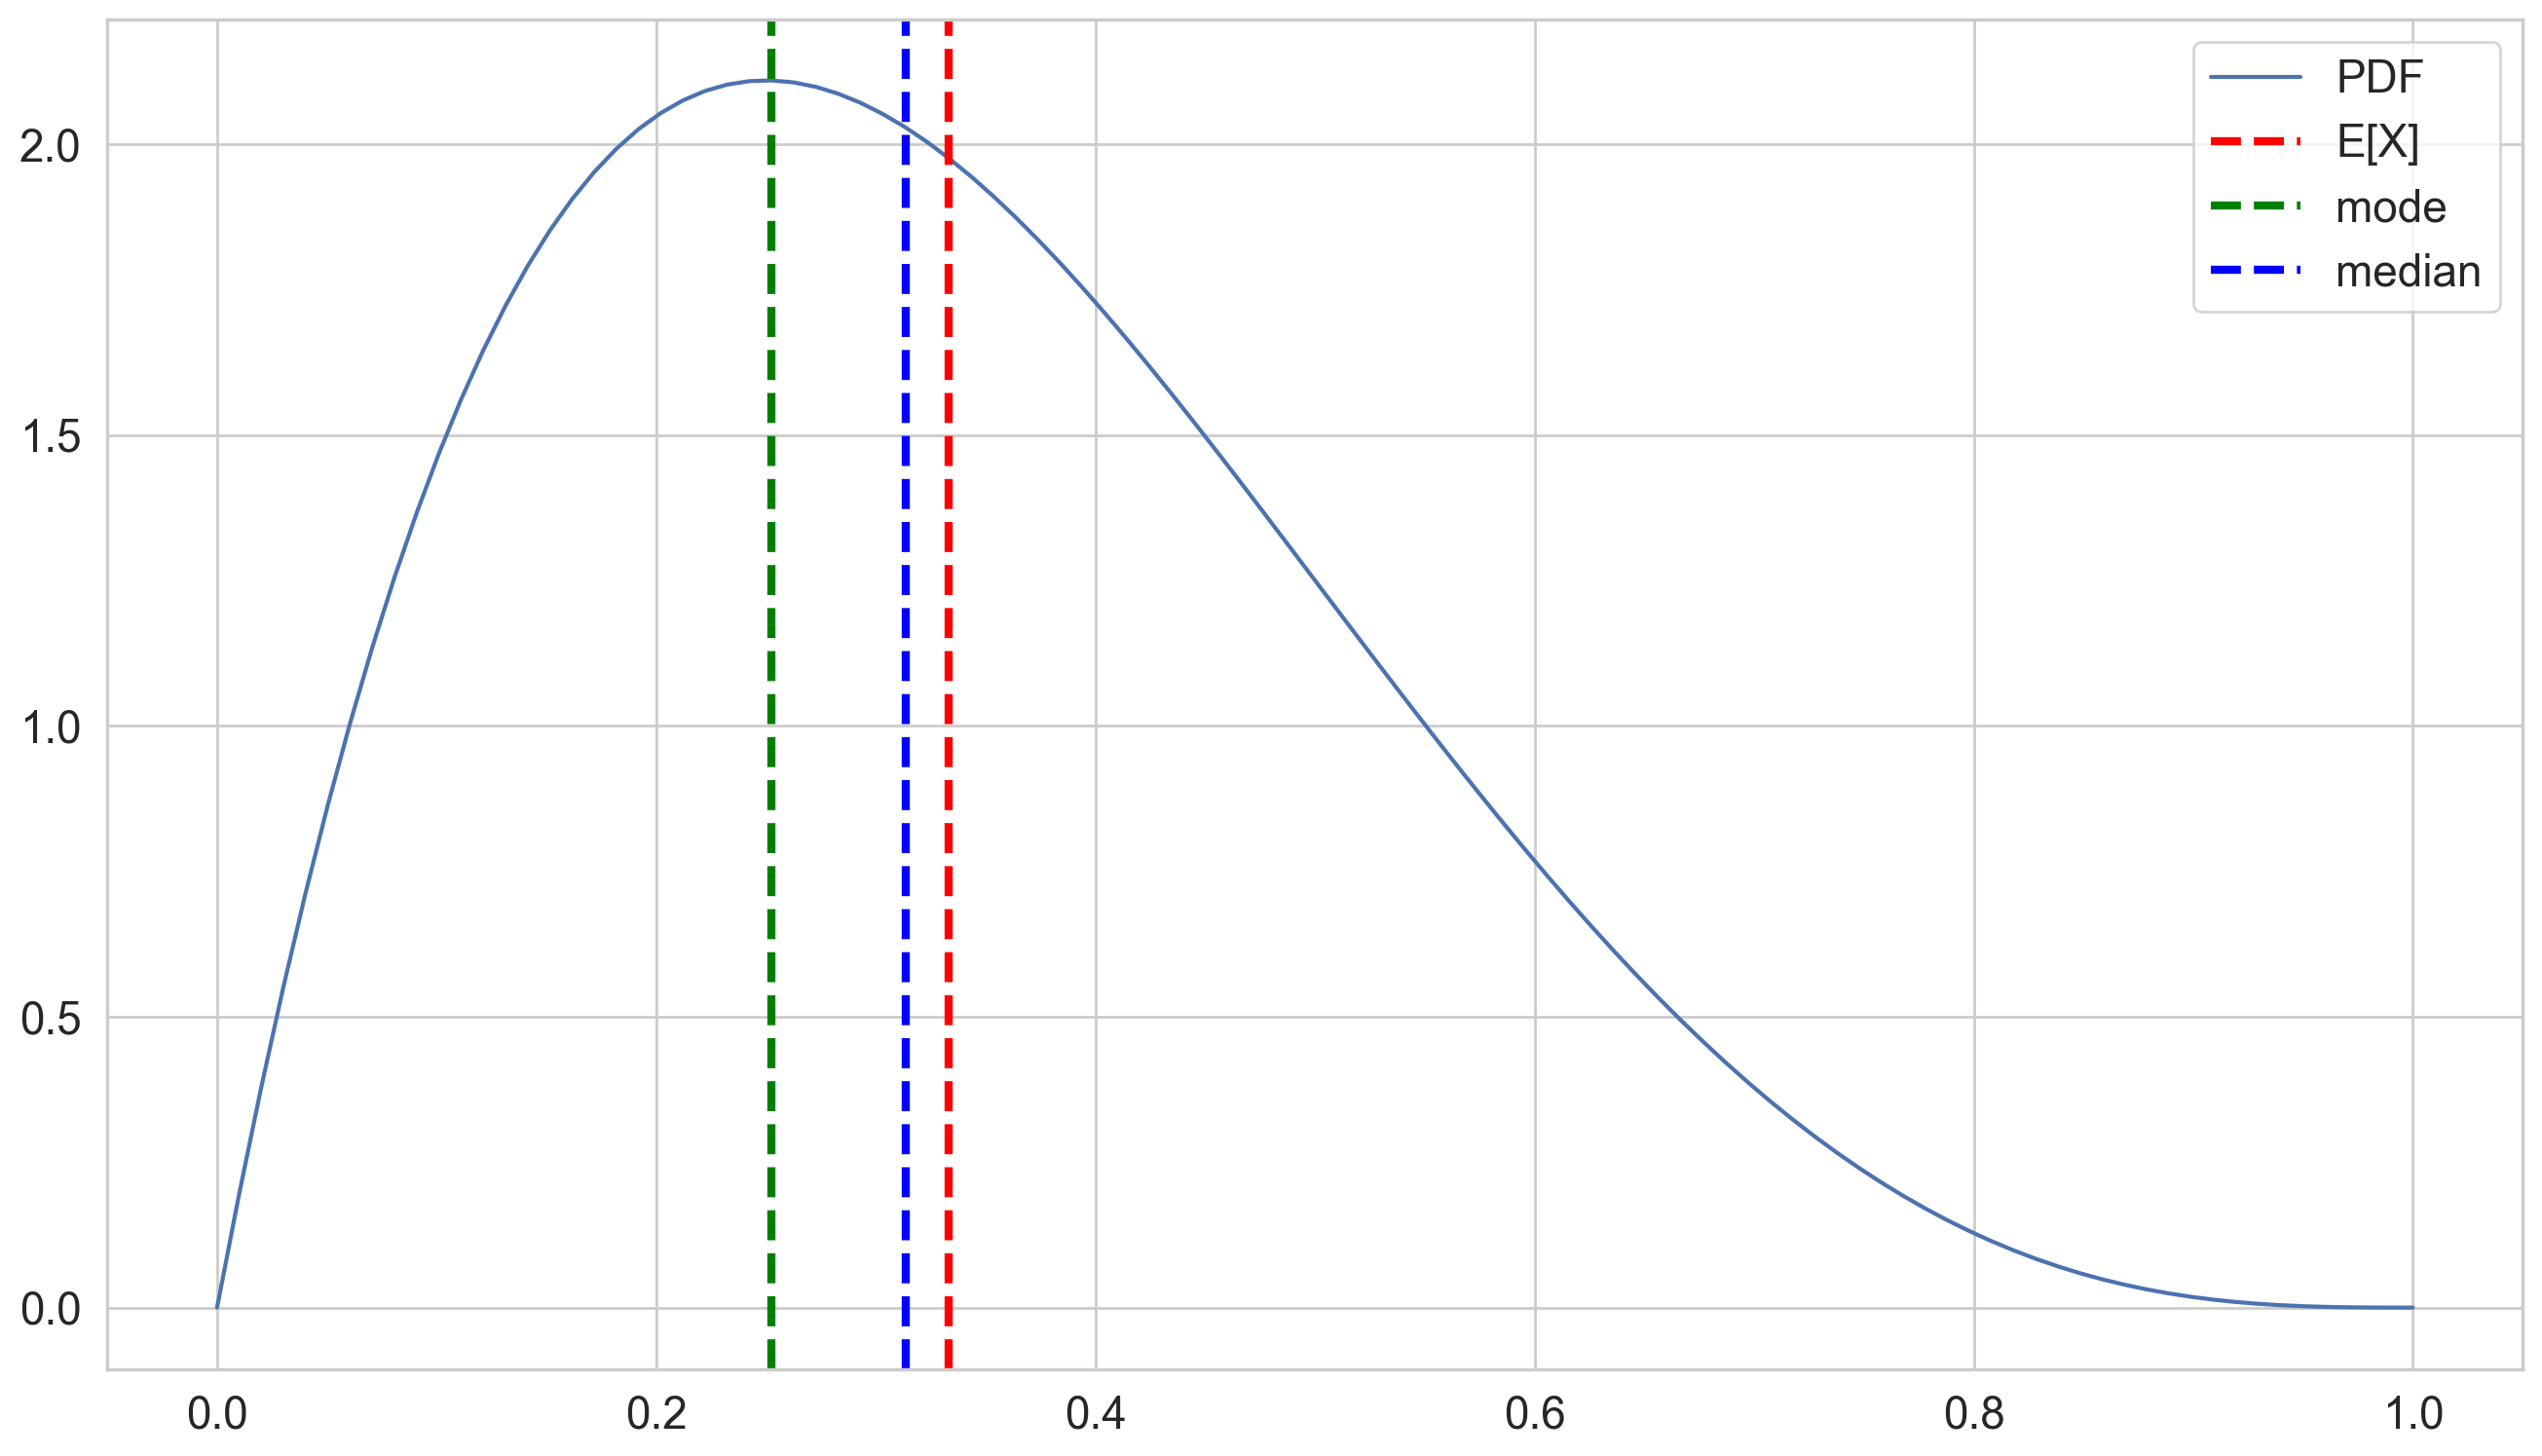

In [42]:
a, b = 2, 4
x = np.linspace(0, 1, 100)
y = sts.beta(a, b).pdf(x)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, y, label="PDF")
ax.axvline(a / (a + b), ls="--", linewidth=3, color="red", label="E[X]")
ax.axvline(x[np.argmax(y)], ls="--", linewidth=3, color="green", label="mode")
ax.axvline(sts.beta(a, b).isf(0.5), ls="--", linewidth=3, color="blue", label="median")
ax.legend();

## Expectation

Mathematical expectation generalizes the concept of mean. Consider probability space $(S, \mathbb{P})$ and discrete random variable $X: S \to \mathbb{R}$. Then expected value of $X$ is
$$
\mathbb{E}\left[X\right] = \sum_k x_k \mathbb{P}(X = x_k)
$$

## Variance

We call **variance** the following quantity of a r.v. $X$ with finite expectation:
$$
\mathbb{V}\text{ar}(X) = \mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]
$$

## Example 1

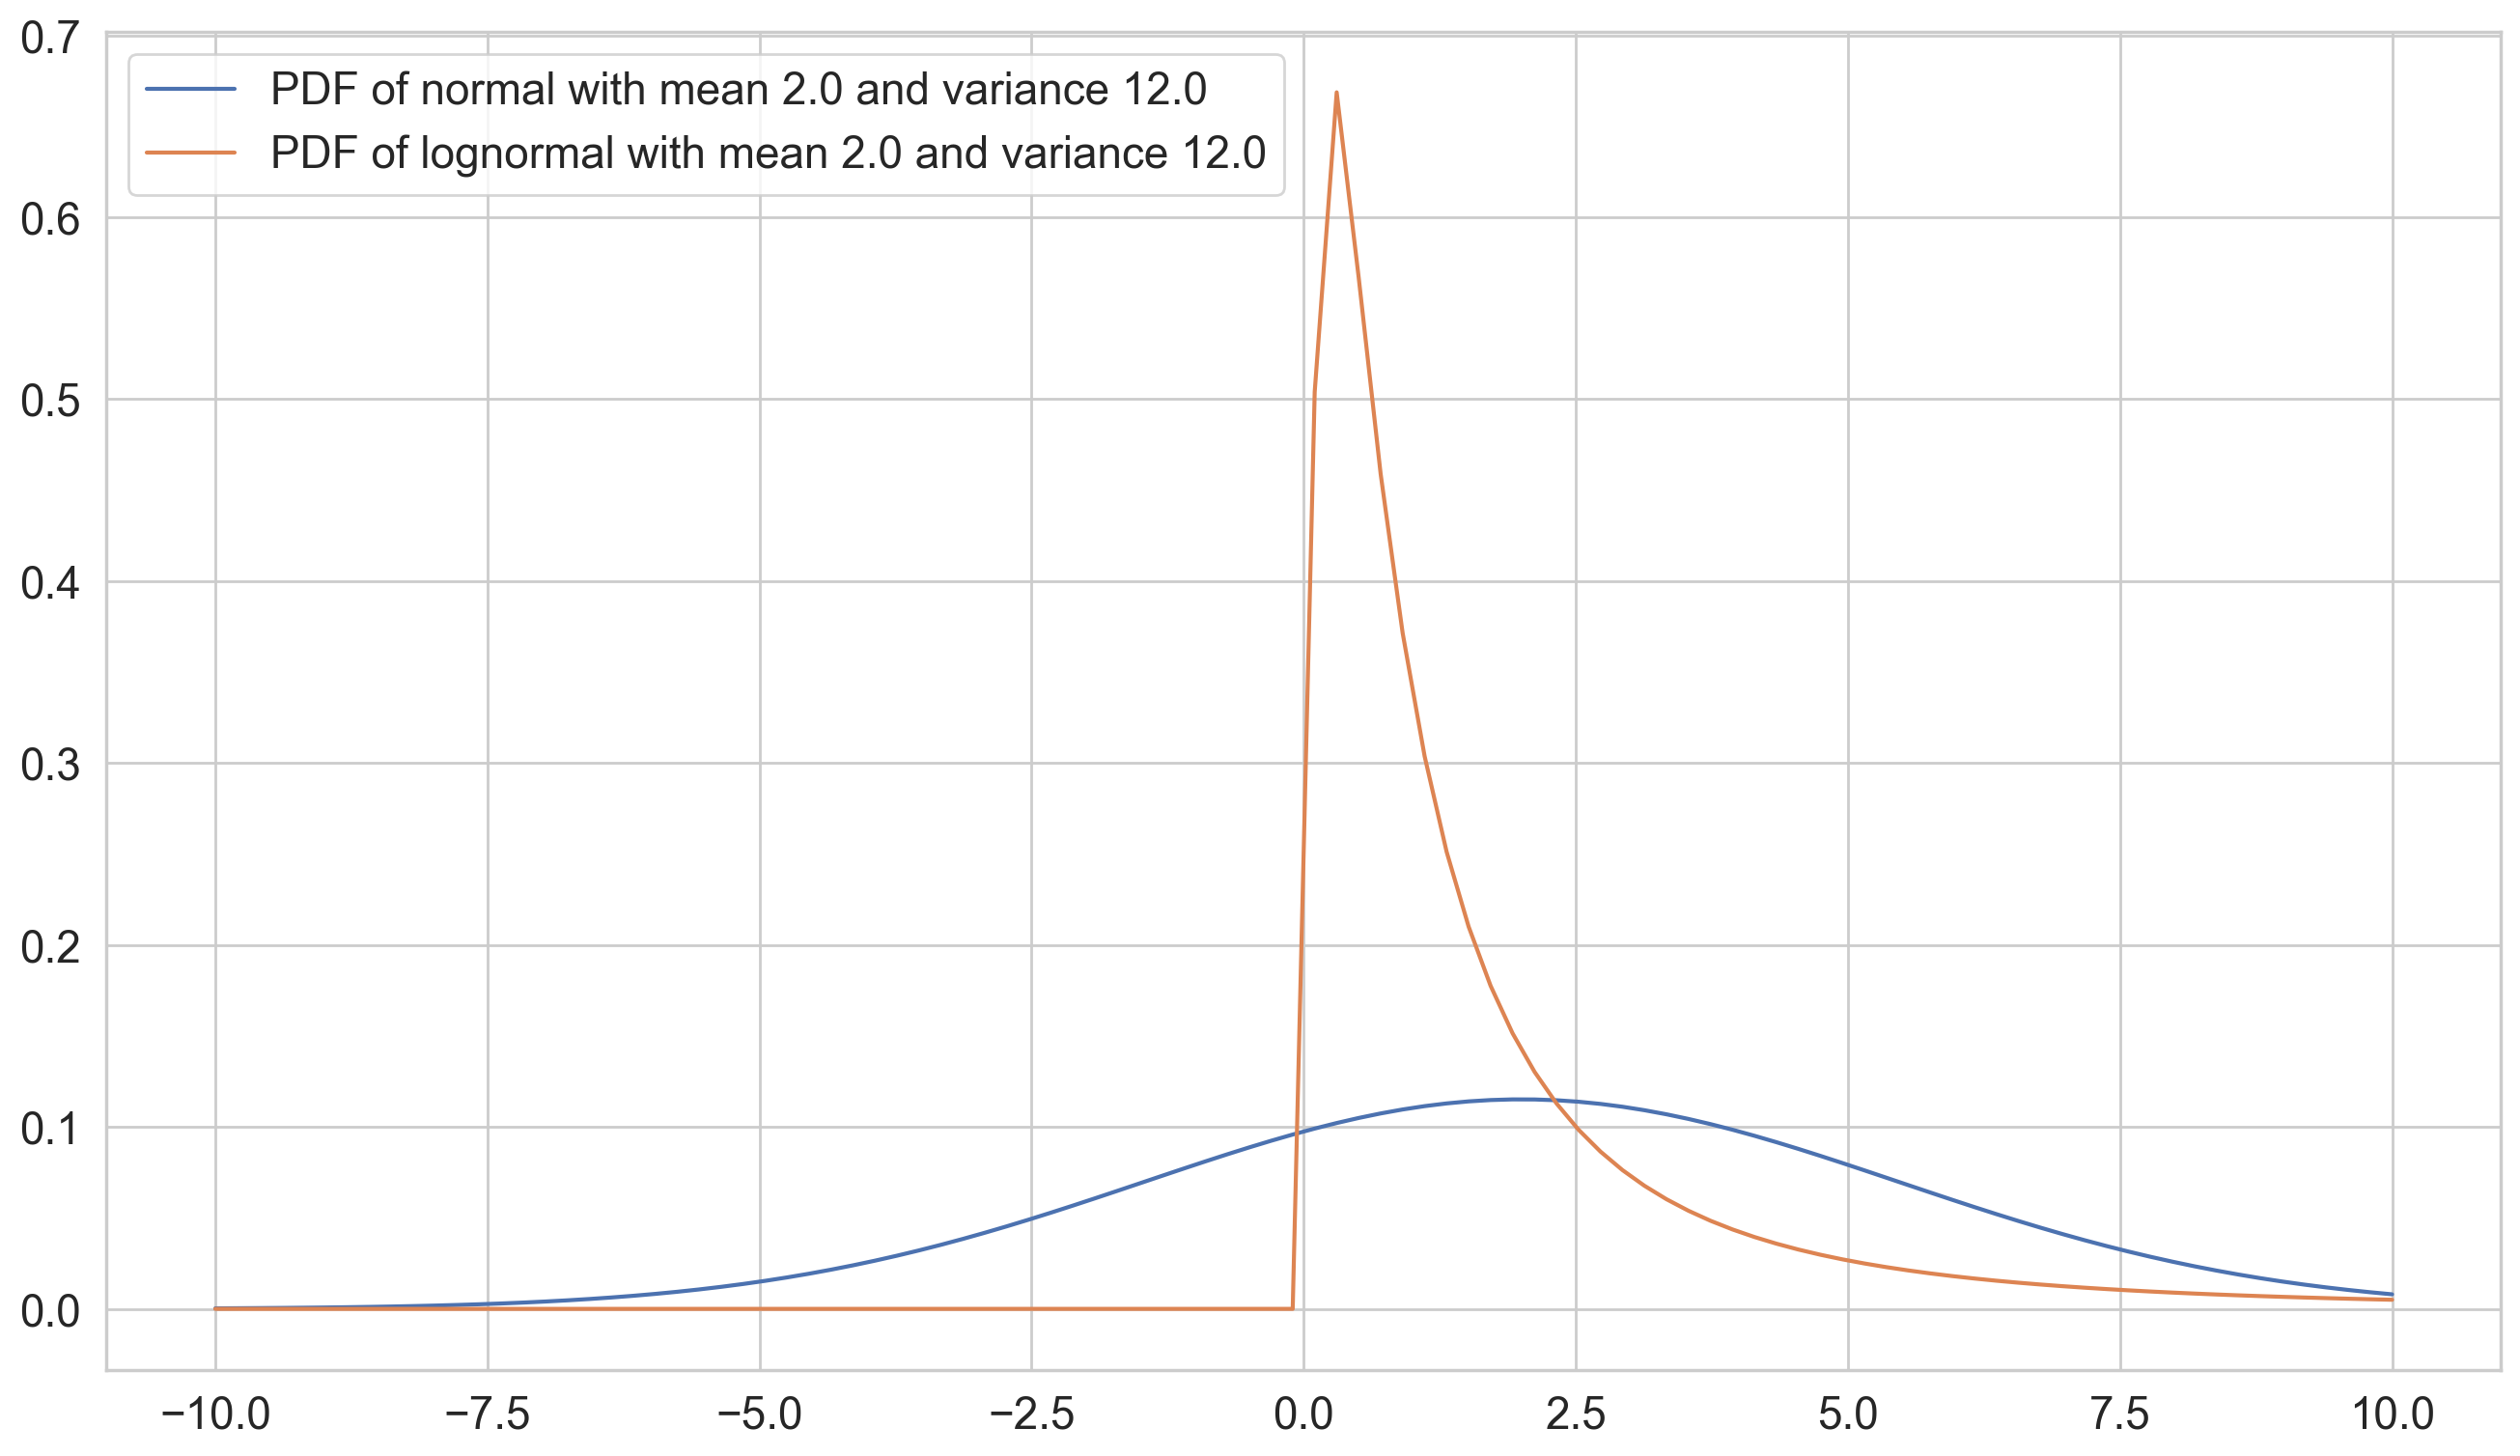

In [43]:
loc, scale = 2, 12
x = np.linspace(-10, 10, 100)
d1 = sts.norm(2, np.sqrt(12))
d2 = sts.lognorm(np.sqrt(2 * np.log(2)))
y1 = d1.pdf(x)
y2 = d2.pdf(x)

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x, y1, label=f"PDF of normal with mean {d1.mean().round()} and variance {d1.var().round()}")
ax.plot(x, y2, label=f"PDF of lognormal with mean {d2.mean().round()} and variance {d2.var().round()}")
ax.legend();

## Example 2

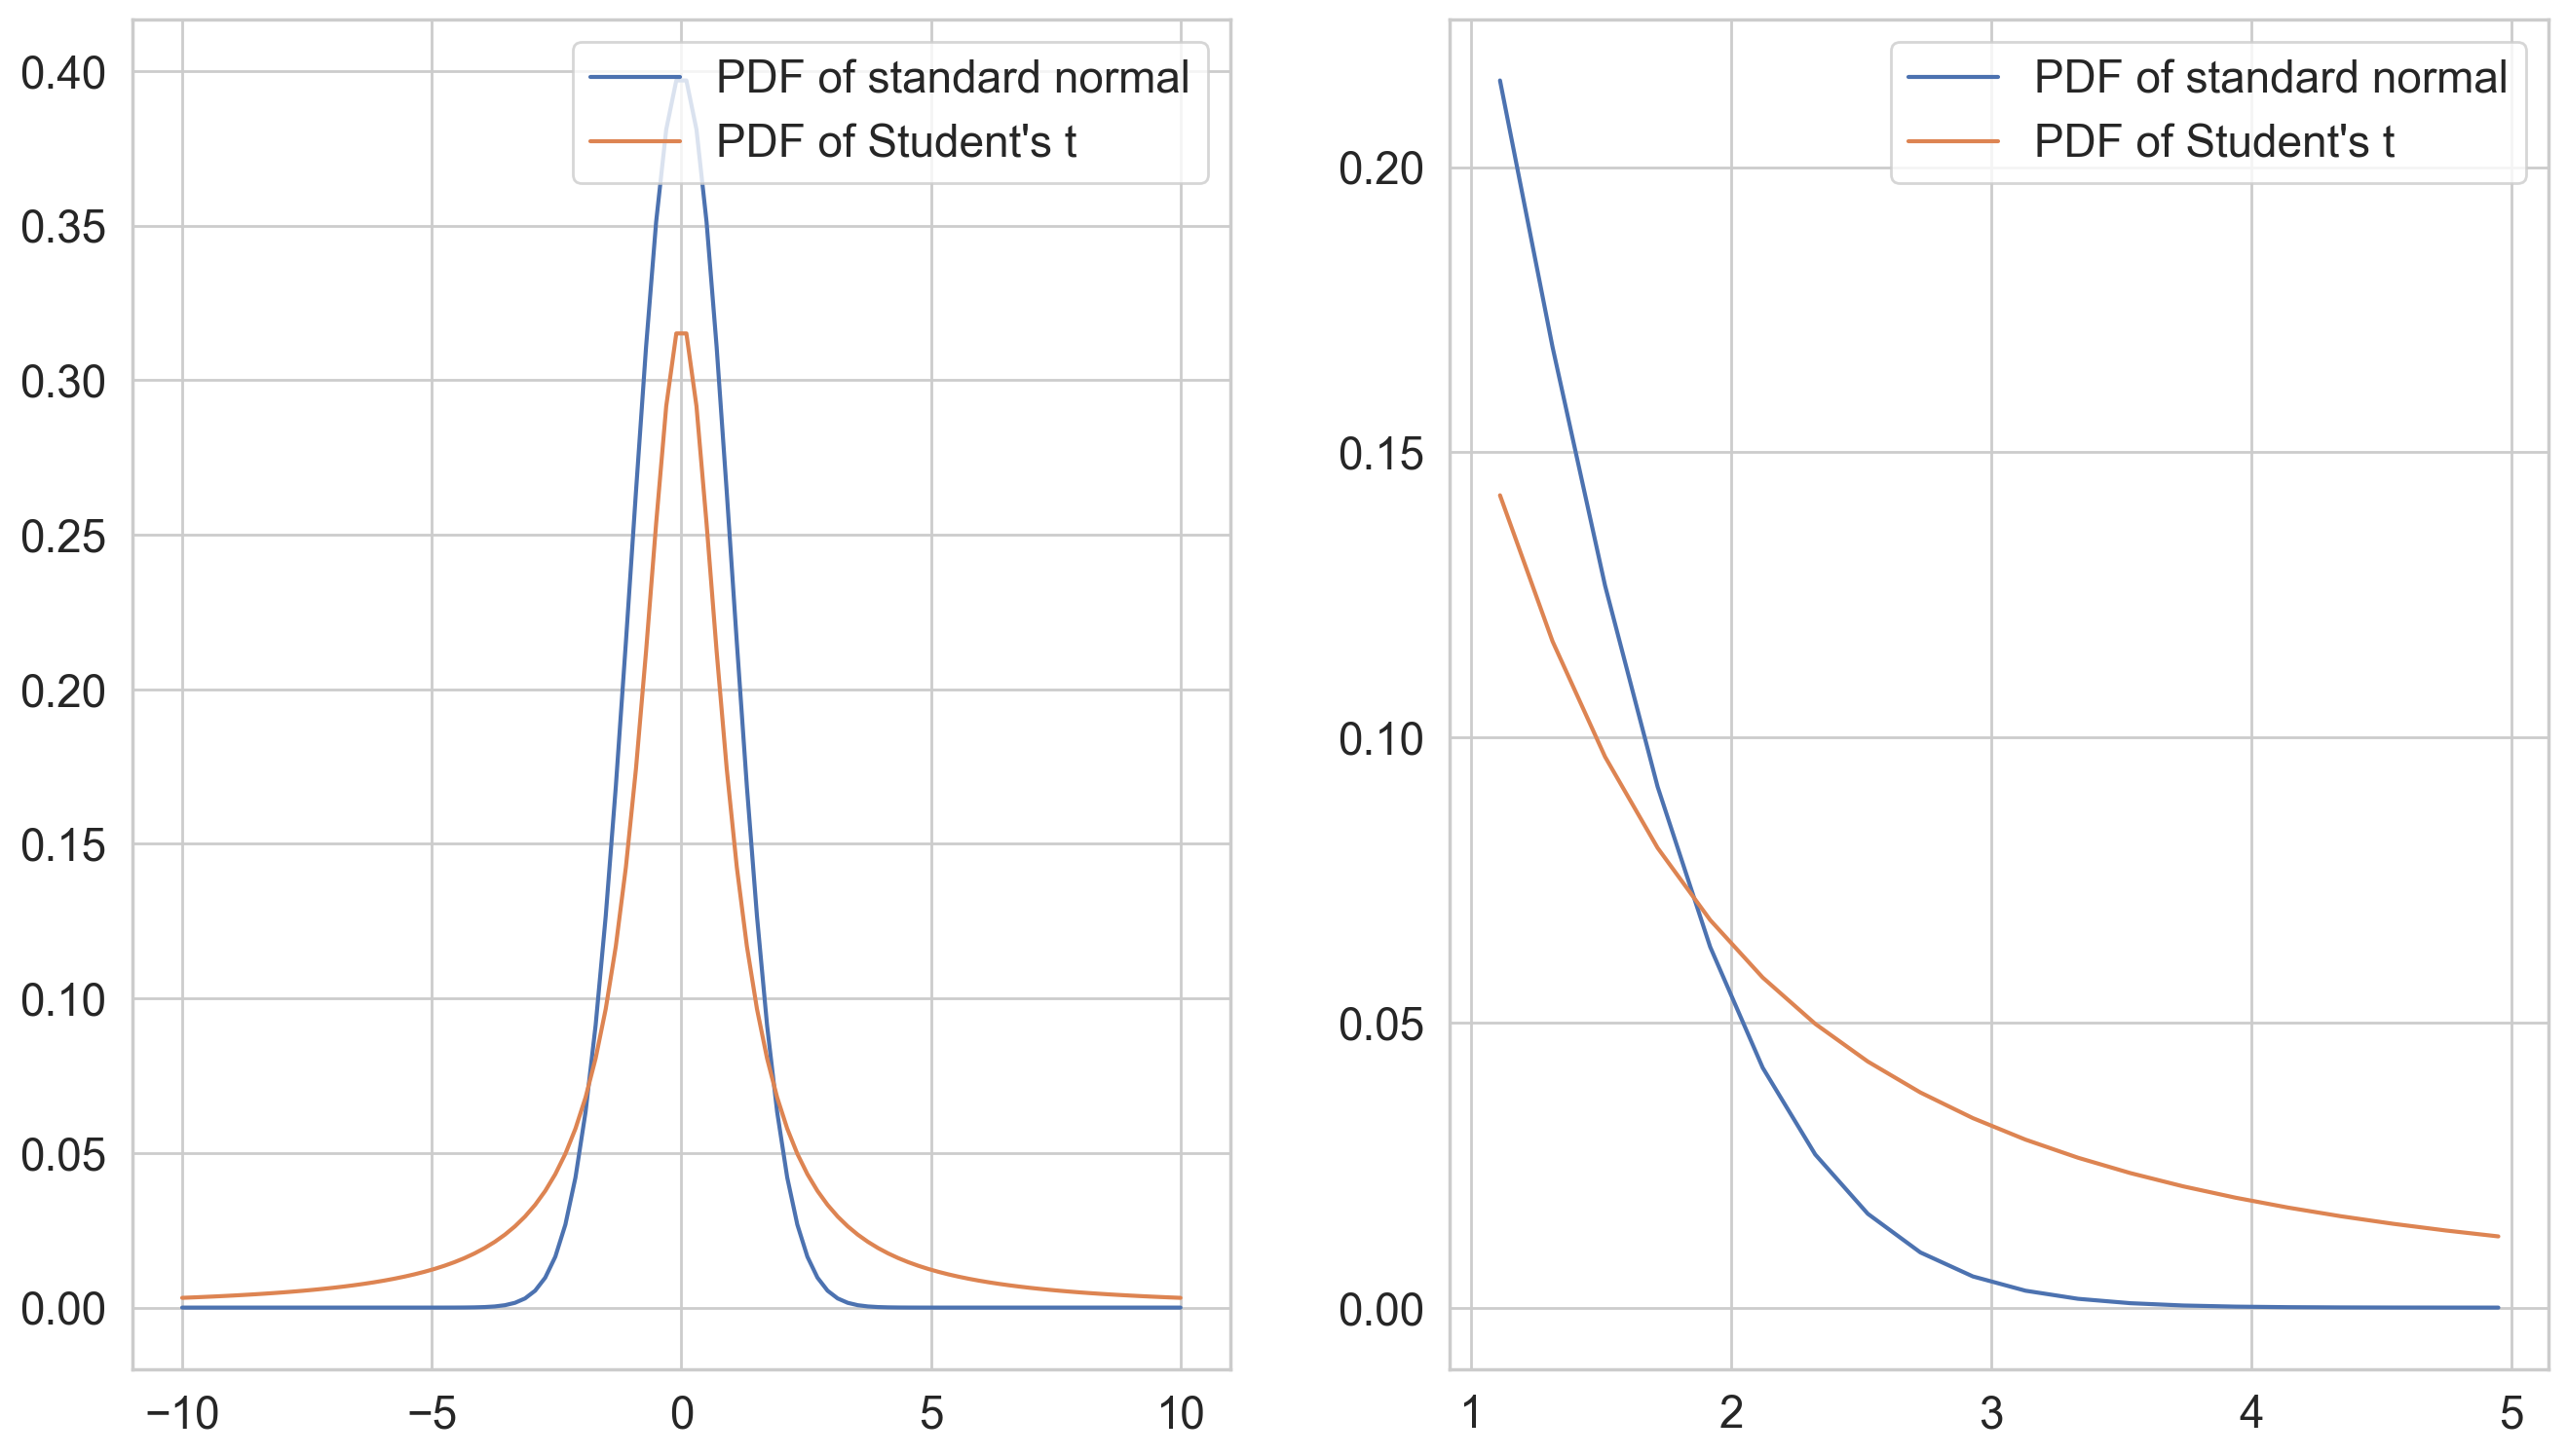

In [44]:
x = np.linspace(-10, 10, 100)
y1 = sts.norm().pdf(x)
y2 = sts.t(1).pdf(x)

fig, ax = plt.subplots(1, 2, figsize=(16,9), sharey=False)
ax[0].plot(x, y1, label=f"PDF of standard normal")
ax[0].plot(x, y2, label=f"PDF of Student's t")
ax[0].legend();
ax[1].plot(x[55:75], y1[55:75], label=f"PDF of standard normal")
ax[1].plot(x[55:75], y2[55:75], label=f"PDF of Student's t")
ax[1].legend();

## Moments of distribution

$\mathbb{E}\left[X^k\right]$ is called $k$-th moment of r.v. $X$.

We say that $k$-th moment is finite if $\mathbb{E}\left[X^k\right] < \infty$.

If $k$-th moment is finite, then all moments $m < k$ are finite as well.

## Kinds of moments

- **Central moment.** $\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^k\right]$
- **Standardised moment.** $\mathbb{E}\left[\left(\frac{X - \mathbb{E}[X]}{\sqrt{\mathbb{V}\text{ar}\left(X\right)}}\right)^k\right]$

## Skewness

Let $X$ be r.v. with expectation $\mu$ and variance $\sigma^2$, then the skewness is defined as its 3rd standardised moment:
$$
\operatorname{skew}(X) = \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^3\right]
$$

## Symmetries

- A r.v. $X$ is said to be symmetric about $\mu$ if $(X - \mu)$ has the same distribution as $(\mu - X)$
- Consider $X$ symmetric about its mean $\mu$. Then $\forall k \in \mathbb{Z}, \; n = 2 k + 1$, we have $\mathbb{E}\left[(X - \mu)^n\right] = 0$
- Since the first central moment will always be 0, we can use the 3rd moment to measure assymetry (skewness).

## Kurtosis

Let $X$ be r.v. with expectation $\mu$ and variance $\sigma^2$, then the kurtosis is defined as its shifted 4rd standardised moment:
$$
\operatorname{kurt}(X) = \mathbb{E}\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] - 3
$$

## Example

Find the skewness and kurtosis of standard normal distribution.

## Solution

$$
\begin{aligned}
f_X(x) & = \frac{1}{\sqrt{2 \pi}} \exp \left( - \frac{x^2}{2} \right), \\
\mathbb{E}[X] & = 0, \\
\mathbb{V}\text{ar}(X) & = 1.
\end{aligned}
$$

$$
\begin{aligned}
\mathbb{E}[X^3] & = \int_{-\infty}^\infty x^3 f_X(x) {\rm d} x = \\
& = \int_{-\infty}^0 x^3 f_X(x) {\rm d} x + \int_{0}^\infty x^3 f_X(x) {\rm d} x = \\
& = \int_{0}^\infty x^3 f_X(-x) {\rm d} (-x) + \int_{0}^\infty x^3 f_X(x) {\rm d} x = \\
& = 0
\end{aligned}
$$

$$
\begin{aligned}
\mathbb{E}[X^4] - 3 & = -3 + \int_{-\infty}^\infty x^4 f_X(x) {\rm d} x = \\
& = -3 + \frac{2}{\sqrt{2 \pi}} \int_0^\infty x^4 \exp \left( - \frac{x^2}{2} \right) {\rm d} x = \\
& = -3 - \frac{2}{\sqrt{2 \pi}} \int_0^\infty x^3{\rm d} \left( \exp \left( - \frac{x^2}{2} \right) \right) = \\
& = -3 - \frac{2}{\sqrt{2 \pi}} \left( \left. x^3 \exp \left( - \frac{x^2}{2} \right) \right|_0^\infty - \int_0^\infty 3 x^2 \exp \left( - \frac{x^2}{2} \right) {\rm d} x\right) = \\
& = -3 + 3 \times \left[ \frac{2}{\sqrt{2 \pi}} \int_0^\infty x^2 \exp \left( - \frac{x^2}{2} \right) {\rm d} x \right] = \\
& = -3 + 3 \times 1 = 0
\end{aligned}
$$